**Introduction**

**Title:** Understanding Alzheimer's Disease Hidden Clusters: An Unsupervised Machine Learning Approach

Neurocognitive impairments, including dementia and Alzheimer's Disease (AD), are serious public health concerns costing billions of dollars to our nation. AD, the most common type of dementia, is a progressive neurocognitive disease effecting millions of individuals in the U.S. According to the Alzheimer's Association (2025), over 7 million Americans live with AD, and by 2050, this number is expected to be 13 million Americans. AD was also the sixth-leading cause of death among those aged 65 and older in 2022 (Alzheimer's Association, 2025).

Epidemiological studies have long revealed that the clinical presentation of AD’s is complicated and heterogeneous, impacted by various biopsychosocial factors. Due to involvement of many biopsychosocial factors, clinicians and researchers experience significant challenges for early detection and prevention, prognosis, and intervention.

Most research studies in AD and dementia rely on clinical categories and simple supervised learning models causing significant challenges to estimate or understand latent variables or substructures among this population. This is a significant issue given some patient groups may not fit well to the diagnostic criteria but still experience AD. Therefore, it is importnat to highlight that unsupervised learning models may provide options to researchers to examine those latent or unstructured variables or groups or patterns which could help us create meaningful and multidimensional models explanining AD. 

In this project, I wanted to apply unsupervised machine learning techniques, including clustering and dimensionality reduction techniques, to identify clinically relevant subgroups among individuals assessed for AD. This analysis will focus on three specific aims with one research question:

**RQ:** Can we detect meaningful patterns or subgroups among patients based on cognitive, physical, and behavioral health features using unsupervised learning?"

**Aim 1:** Examine underlying factors in demographic, lifestyle, and cognitive features;

**Aim 2:** Determine potential clusters of patients with similar risk profiles;

**Aim 3:** Visualizing high-dimensional patient data to better capture heterogeneity among patients;

This data was obtained from the Kaggle via El Kharoua (2024) via http://kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset.

**References**

**1.** Alzheimer’s Association. (2025). Alzheimer’s Disease Facts and Figures. Retrieved from https://www.alz.org/alzheimers-dementia/facts-figures

**2.** Alzheimer’s Association. (2025). What is Alzheimer’s Disease?. Retrieved from https://www.alz.org/alzheimers-dementia/what-is-alzheimers

**3.** El Kharoua, R. (2023). Alzheimer's Disease Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset (@misc{rabie_el_kharoua_2024,
title={Alzheimer's Disease Dataset},
url={https://www.kaggle.com/dsv/8668279},
DOI={10.34740/KAGGLE/DSV/8668279},
publisher={Kaggle},
author={Rabie El Kharoua},
year={2024}
})

**Important Disclaimer:** This work was developed as part of a course assignment and is intended solely for educational and demonstration purposes. The analysis and interpretations presented here are based on publicly available data and may contain inaccuracies, simplifications, and errors. The findings do not constitute clinical guidance, diagnostic tools, or policy recommendations. The dataset used in this project—“Alzheimer's Disease Dataset”—was obtained from Kaggle, which hosts the dataset publicly for research and learning purposes. The dataset was originally uploaded by Rabie El Kharoua and includes simulated or anonymized data for educational use. The original source can be found at: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset. The author of this project used the data to fulfill requirements for a graduate-level machine learning course, including data preprocessing, exploratory data analysis, and unsupervised modeling. The author does not claim responsibility for any decisions made based on the outputs of this project.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


In [2]:
#Step 1: Inspecting Data 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd

file_path = "/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv"
df = pd.read_csv(file_path)

# Summary statistics
print("Summary Statistics (Numeric Variables):")
display(df.describe().transpose())  # This will work in Jupyter/Kaggle
# OR: print(df.describe().transpose()) if display doesn't work

print("\nData")
print(f"Shape: {df.shape}")
display(df.head())

#Columns
print("\nColumn Names:")
print(df.columns.tolist())


Summary Statistics (Numeric Variables):


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346



Data
Shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid



Column Names:
['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']


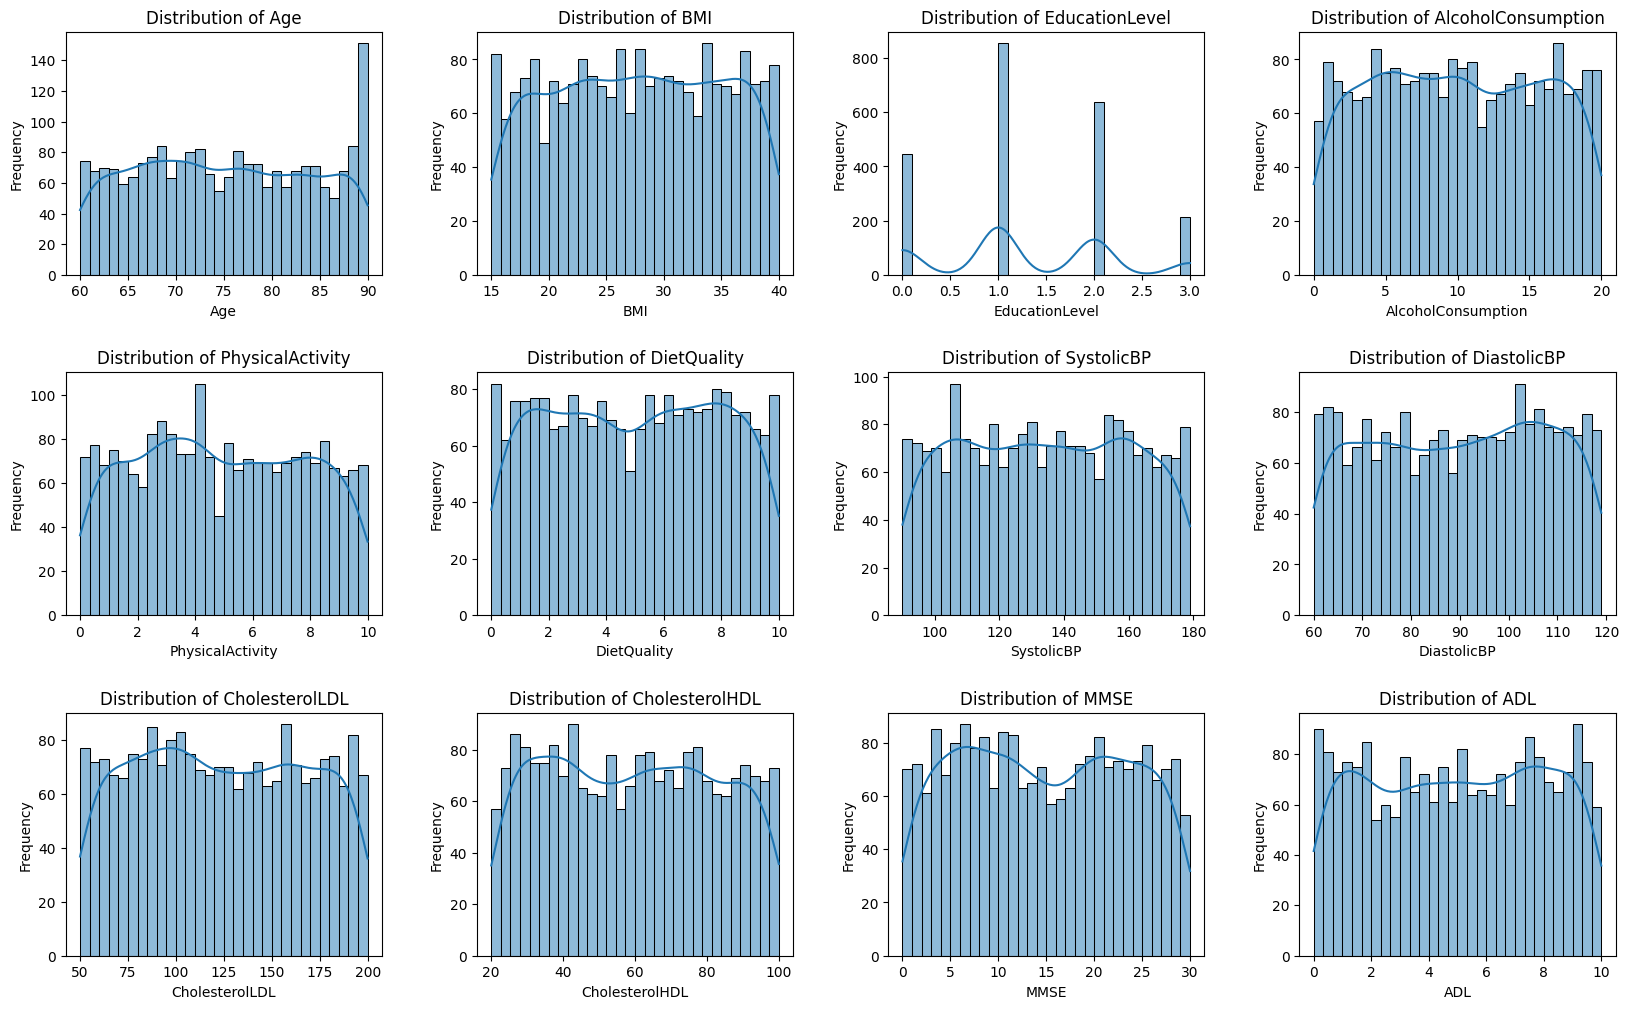

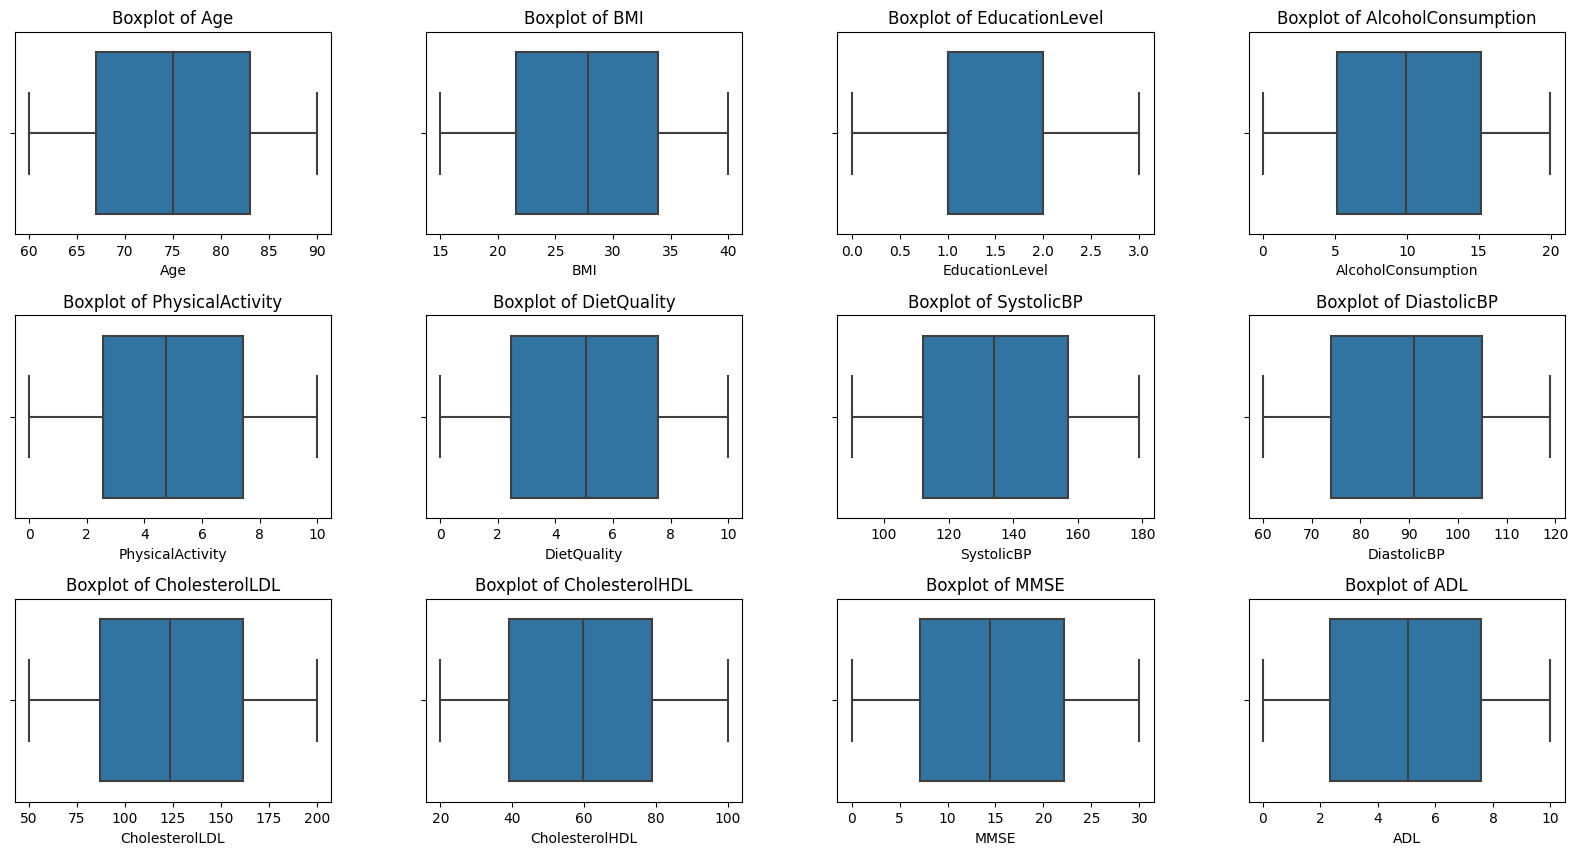

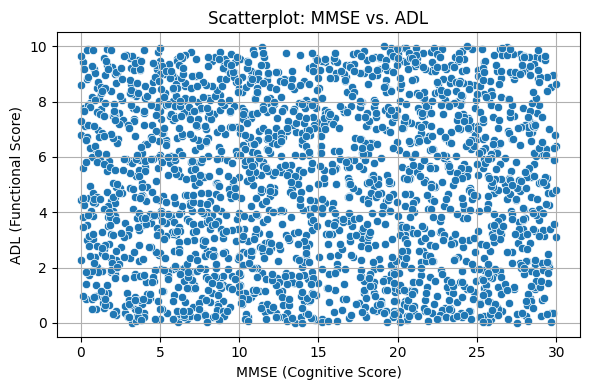

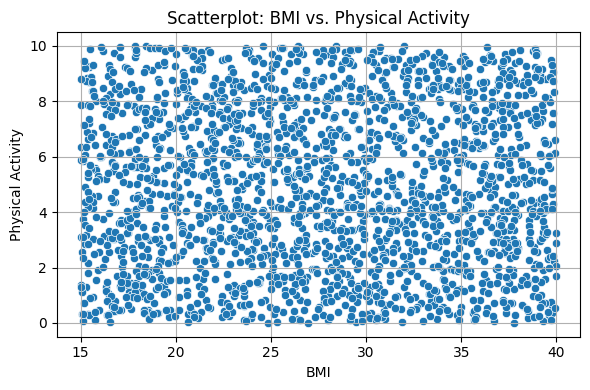

In [5]:
#1a. data visualizations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: df should already be defined and contain your data
# List of features to plot
features = [
    'Age', 'BMI', 'EducationLevel', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolLDL', 'CholesterolHDL', 'MMSE', 'ADL'
]

#1a. Grids
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

#1a1. histograms
for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

#1a1.Boxplots
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

#1a3. cognitive (mmse) vs. functional status (adl)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='MMSE', y='ADL')
plt.title("Scatterplot: MMSE vs. ADL")
plt.xlabel("MMSE (Cognitive Score)")
plt.ylabel("ADL (Functional Score)")
plt.grid(True)
plt.tight_layout()
plt.show()

#1a4. BMI vs. Physical Activity
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='BMI', y='PhysicalActivity')
plt.title("Scatterplot: BMI vs. Physical Activity")
plt.xlabel("BMI")
plt.ylabel("Physical Activity")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
#1b. Dropping some variables
AD_cleaned = df.drop(columns=['PatientID', 'Diagnosis', 'DoctorInCharge'])

To clean the dataset, I dropped multiple variables including `PatientID`, `Diagnosis`, and `DoctorInCharge`. These columns were not be used in my modeling and analysis practice and not needed for unsupervised learning because they either encode no clinical meaning or introduce label information that can bias clustering results.

Missing values per column:
Series([], dtype: int64)


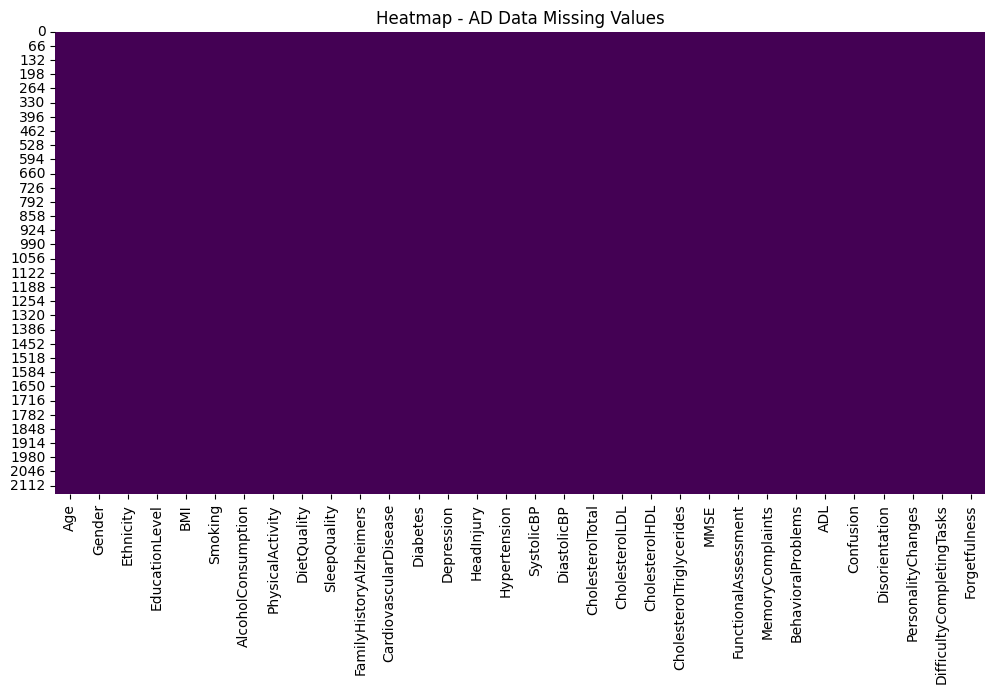

In [7]:
#1c. Missing data and Cleaning Data
import matplotlib.pyplot as plt
import seaborn as sns

#1c1. Missing value counts
missing_counts = AD_cleaned.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

#1c2. Columns with missing values
print("Missing values per column:")
print(missing_counts)

#1c3. missing value heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(AD_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap - AD Data Missing Values")
plt.show()

I checked missing values in the dataset using summary counts and a heatmap. The results revaeled that there are no missing values across any of the features in `AD_cleaned`. Therefore, I did not conduct any imputation technique. The dataset was complete and ready for analyses and modeling practices.


In [8]:
#1cc. Outliers 
import numpy as np

outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']):
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]
    outlier_counts[col] = outliers.shape[0]

outlier_counts = {k: v for k, v in outlier_counts.items() if v > 0}
print("Outliers per column:\n", outlier_counts)
print(df['HeadInjury'].value_counts())


Outliers per column:
 {'HeadInjury': 199}
HeadInjury
0    1950
1     199
Name: count, dtype: int64


A review of potential outliers identified HeadInjury as a feature with 199 flagged values. However, HeadInjury is a binary variable (0/1), and the flagged cases correspond to valid entries indicating a head injury. This reflects class imbalance, not data errors. Therefore, no cleaning or removal was required for this variable.



In [9]:
#1d. Standardize the Data
from sklearn.preprocessing import StandardScaler

#1d1. Extracted all numeric columns
X = AD_cleaned.select_dtypes(include=['int64', 'float64'])

#1d2. Checked scaler and fit_transform
scaler = StandardScaler()
AD_scaled = scaler.fit_transform(X)

#1d3. Confirmed shape
print("Scaled data shape:", AD_scaled.shape)

print(df['HeadInjury'].value_counts())


Scaled data shape: (2149, 32)
HeadInjury
0    1950
1     199
Name: count, dtype: int64


In order to prepare dataset for the models, I conducted procedures to standardize all numerical features with Z-score calculation (mean = 0, standard deviation = 1), which made sure all features contribute equally to distance-based algorithms such as K-Means and PCA, regardless of their original scales. The resulting standardized dataset (`AD_scaled`). Standardization was necessary given the diverse scales of features such as cholesterol levels, cognitive scores (MMSE), and binary medical conditions.


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


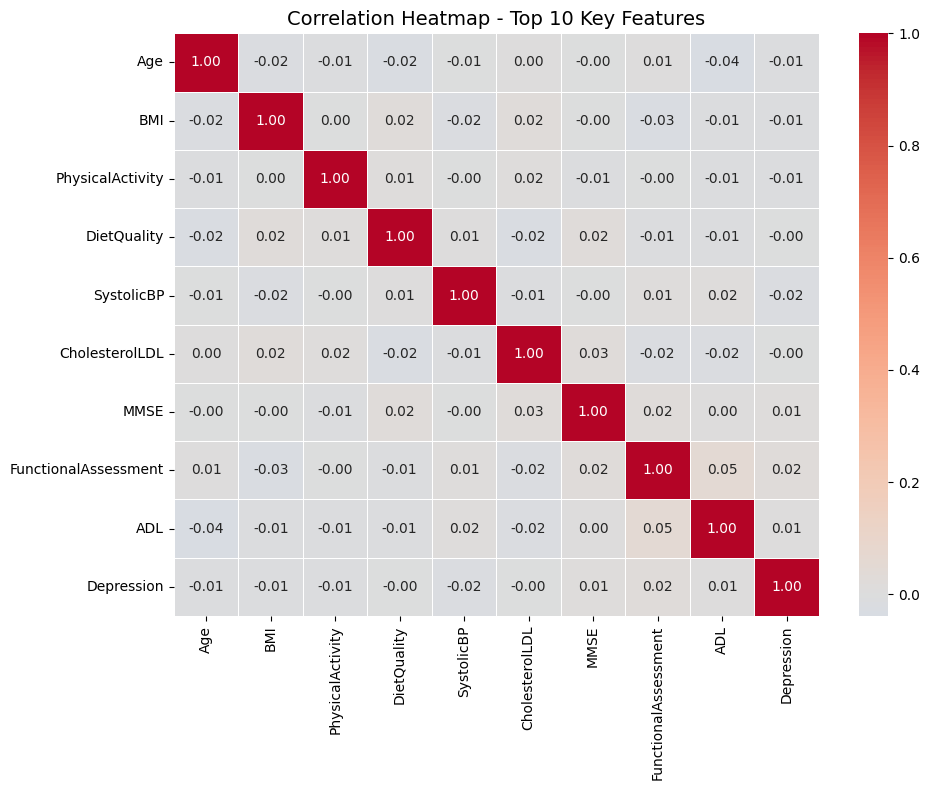

In [10]:
#1e. Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#1e1. correlation matrix
key_features = [
    'Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SystolicBP',
    'CholesterolLDL', 'MMSE', 'FunctionalAssessment', 'ADL', 'Depression'
]

corr_matrix_reduced = AD_cleaned[key_features].corr().fillna(0)

#1e2. heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reduced, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap - Top 10 Key Features", fontsize=14)
plt.tight_layout()
plt.show()

Based on previous existing research on AD and visualized results above, several factors are expected to be particularly important in predicting cognitive and functional outcomes in this data. For example, the Mini-Mental State Examination (MMSE) is a well-established scale of cognitive function, which is well studied in AD research. Also, the Activities of Daily Living (ADL) is important for functional independence among AD patients. Age is of course a natural and important critical factor since aging is strongly associated with AD. Family history is another important risk factor for AD diagnosis. Education plays a protective role in AD diagnosis based on previous research. We also have some modifiable factors like physical activity and diet quality which are important for brain health. Vascular health outcomes may also play role in AD incident. These variables will be examined carefully in both exploratory and predictive modeling stages to assess their actual impact and validate these initial hypotheses.

In [11]:
#Step 2. Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions
#Step 2a. Data Prep for Clusters
#2a1. Use scaled numeric data
from sklearn.decomposition import PCA

#2a2. Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
AD_pca = pca.fit_transform(AD_scaled)

In [12]:
#2b. k-means clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#2b1. different values of k
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(AD_scaled)
    sil_scores.append(silhouette_score(AD_scaled, labels))

#2b2. Best k
best_k = sil_scores.index(max(sil_scores)) + 2
print("Best k:", best_k)

#2b3. Final model
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(AD_scaled)


Best k: 4


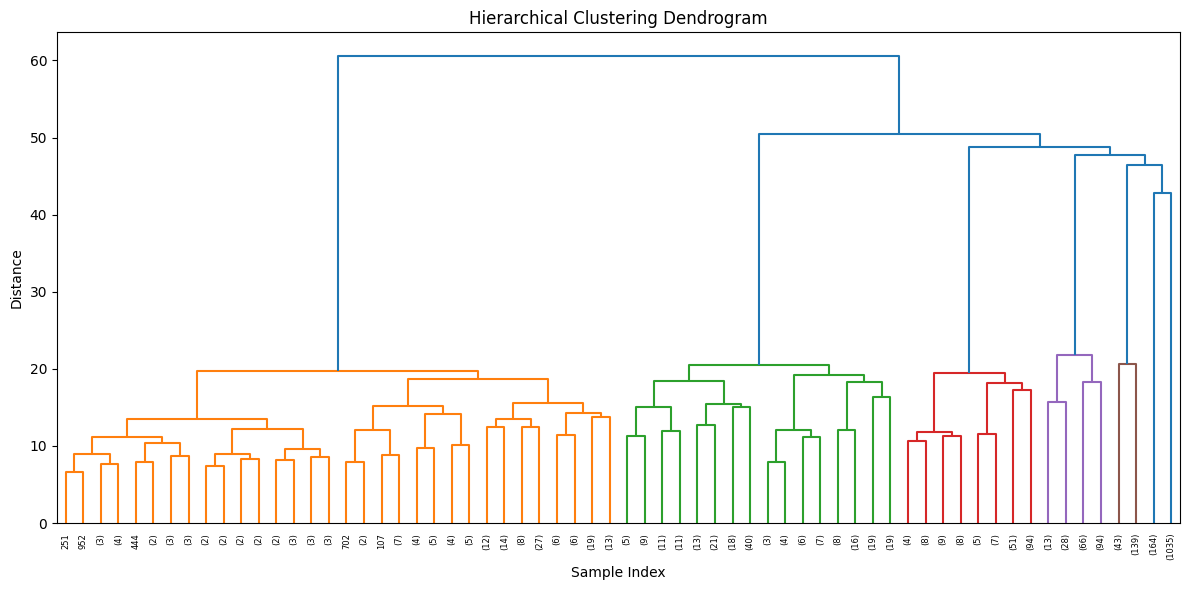

In [13]:
#2c. Hierarchical Clusters
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(AD_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [14]:
#2d. DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(AD_scaled)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("DBSCAN clusters:", n_clusters_dbscan)

DBSCAN clusters: 0


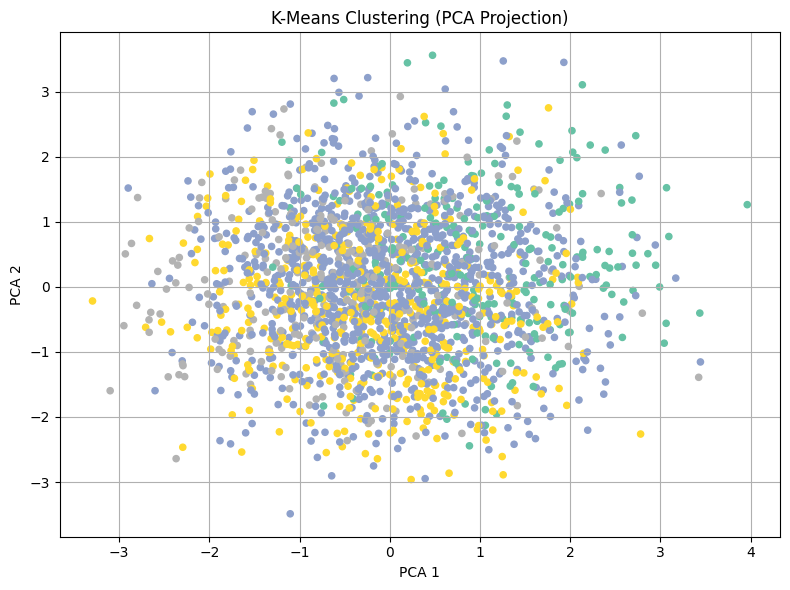

In [15]:
#2e. Visual Clusters via PCA
plt.figure(figsize=(8, 6))
plt.scatter(AD_pca[:, 0], AD_pca[:, 1], c=kmeans_labels, cmap='Set2', s=20)
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation**

We run multiple unsupervised learning models using standardized biopsychosocial features in order to determine latent subgroups for those with AD. 

First, we run K-Means Clustering by using silhouette analysis. We found 4 clusters as the optimal number (k=4). My PCA-projected scatterplot revealed a moderate visual separation between groups. While the clusters are not linearly separable in 2D, they showed distinguishable groupings in the full feature space. This model performed best in terms of stability and interpretability.

Second, we run Hierarchical Clustering via the agglomerative clustering dendrogram. This model revealed consistent subgrouping patterns, supporting the K-Means findings. This method helped us have insight into how AD patient profiles merge at various similarity thresholds.

Third, we run Density-based clustering (DBSCAN) which failed to identify any significant clusters (0 clusters returned). This result is common in high-dimensional medical datasets with overlapping classes and noise. This also highlights DBSCAN's sensitivity to parameter tuning and cluster density.

**Summary of Findings**

We had a total of 4 clusters via K-Means (k=4) and it was the most informative method, revealing four distinct patient profiles. Hierarchical clustering provided supporting structure and interpretability aligning with K-Means. However, DBSCAN was not suitable for this dataset under current hyperparameters.

In [18]:
#2f. Clusters interpretation
#2f1. Reattach cluster labels
import pandas as pd

#2f1. Create a DataFrame from the scaled data for clarity
AD_scaled_df = pd.DataFrame(AD_scaled, columns=AD_cleaned.columns)
AD_scaled_df['Cluster'] = kmeans_labels  # Add cluster labels

In [19]:
#2f2. Grouping by clusters and mean values for each feature
cluster_summary = AD_scaled_df.groupby('Cluster').mean()
display(cluster_summary)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.052614,0.137630,-0.008926,0.019224,0.001170,0.107026,-0.067653,-0.019101,-0.036691,-0.007933,...,0.067588,-0.093770,0.065114,-0.008170,-0.048311,0.036073,0.068332,-0.104003,0.077002,0.069287
1,0.034781,0.019460,0.040969,-0.004353,-0.027455,-0.000681,0.030330,-0.012100,0.009704,-0.010378,...,-0.017691,-0.020877,0.005978,-0.016106,-0.005306,-0.005202,0.005197,0.018437,0.011430,-0.657048
2,-0.041662,-0.094116,-0.034586,-0.006114,0.073254,0.002634,-0.025218,-0.015593,-0.019379,-0.008782,...,0.023337,0.022518,-0.004916,0.088068,0.010894,0.007287,-0.051318,0.004451,-0.058404,1.521959
3,-0.013368,-0.047268,-0.082731,0.007443,-0.014030,-0.093693,-0.009242,0.081091,0.026628,0.055523,...,-0.031516,0.119636,-0.069461,-0.066895,0.043884,-0.023840,-0.001327,0.019454,-0.019867,-0.031529


In [20]:
#2f3. Adding diagnosis for posthoc cluster validation
AD_scaled_df['Diagnosis'] = df['Diagnosis']  # Add original label
pd.crosstab(AD_scaled_df['Cluster'], AD_scaled_df['Diagnosis'])

Diagnosis,0,1
Cluster,,
0,170,103
1,695,398
2,305,161
3,219,98


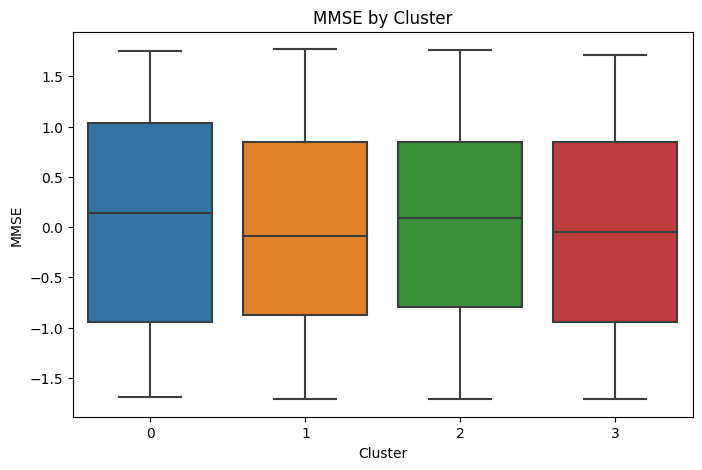

In [21]:
#2f4. Visualization for Clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of MMSE by Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=AD_scaled_df, x='Cluster', y='MMSE')
plt.title('MMSE by Cluster')
plt.show()

In [22]:
#2f5. Generating summary table for cluster means
cluster_summary = AD_scaled_df.groupby('Cluster').mean()
display(cluster_summary[['MMSE', 'ADL', 'Age', 'PhysicalActivity', 'Depression']])  # Add others if needed

,MMSE,ADL,Age,PhysicalActivity,Depression
Cluster,,,,,
0,0.067588,-0.048311,-0.052614,-0.019101,0.002265
1,-0.017691,-0.005306,0.034781,-0.012100,-0.021045
2,0.023337,0.010894,-0.041662,-0.015593,0.040407
3,-0.031516,0.043884,-0.013368,0.081091,0.011211


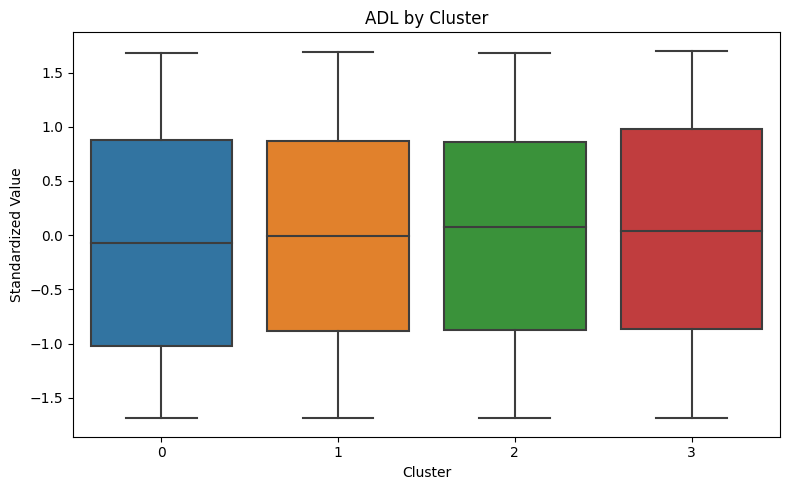

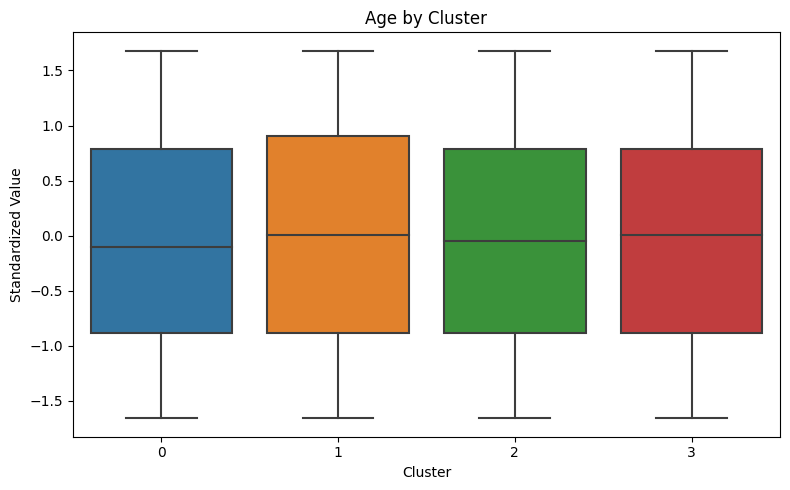

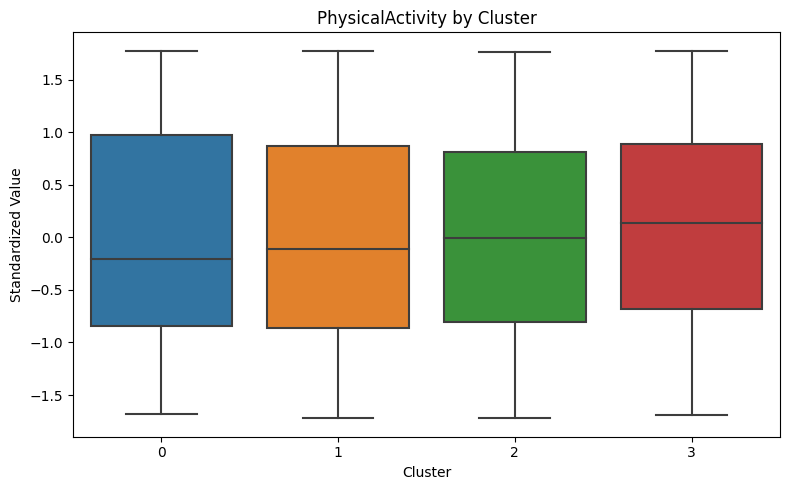

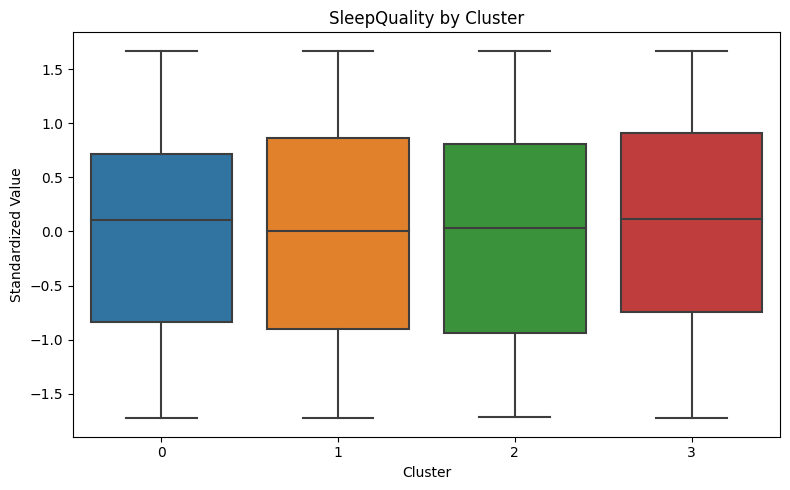

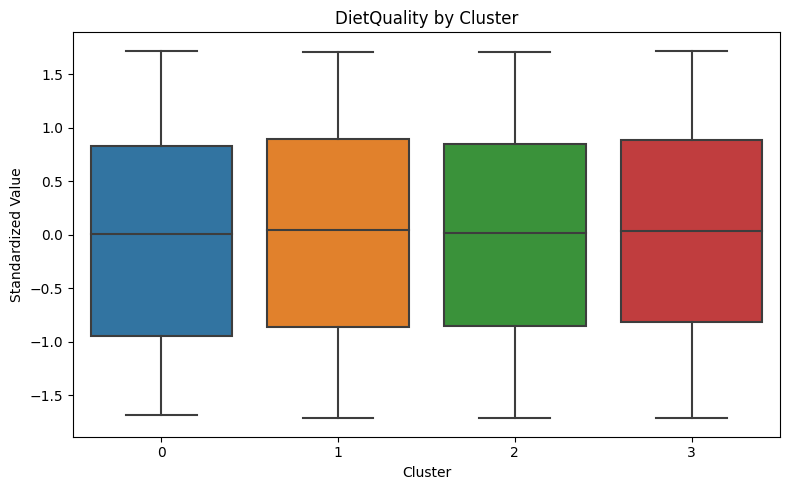

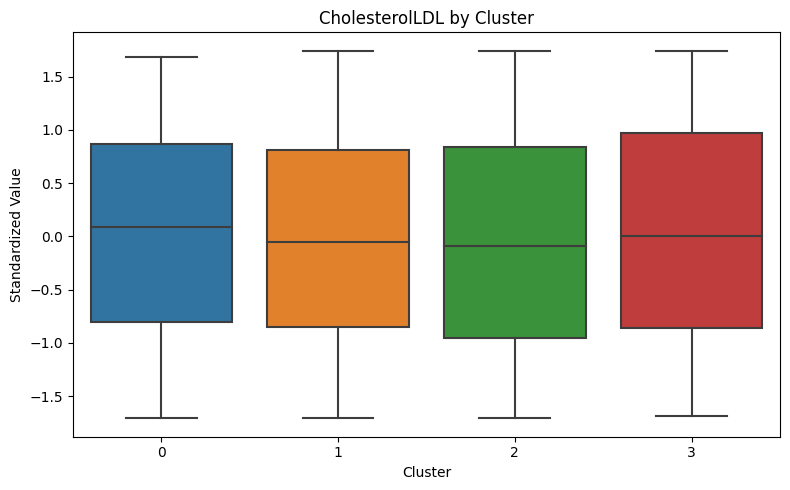

In [23]:
#2f6. boxplots for clusters
for feature in ['ADL', 'Age', 'PhysicalActivity', 'SleepQuality', 'DietQuality', 'CholesterolLDL']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=AD_scaled_df, x='Cluster', y=feature)
    plt.title(f'{feature} by Cluster')
    plt.ylabel('Standardized Value')
    plt.xlabel('Cluster')
    plt.tight_layout()
    plt.show()

**Conclusion and Interpretation**
With this project, I explored an AD dataset using unsupervised learning techniques learned in class and out of class to reveal hidden patterns that might inform clinical and research insight. This work consists of detailed exploratory data analysis (EDA), dimensionality reduction using Principal Component Analysis (PCA), and clustering using both K-Means, Hierarchical Clustering, and DBSCAN algorithms.

**Exploratory Findings:** This data included 2,149 observations with a various set of clinical and behavioral factors, such as cognitive functioning (MMSE), physical health indicators (e.g., BMI, blood pressure, cholesterol), lifestyle risk and protective factors (e.g., physical activity, diet, sleep), and diagnostic variables (e.g., depression, memory complaints). I run analyses to create histograms and boxplots that revealed reasonably distributed variables. My correlation heatmap showed generally low correlations between variables, suggesting that complex or nonlinear relationships may exist that unsupervised models could capture. I also checked data carefully to see if low correlations are due to an error and I found that there was no error or mistake.

**Data Transformation and Cleaning:** I first standardized all continuous variables using StandardScaler. This helped me to standardize scores for all variables that were measured on different scales. I later confirmed no missing data and created a heatmap for missing data. I also handled minor outliers by retaining them, given their potential relevance in clinical subtypes.

**Unsupervised Learning Results:** After running PCA and models, it helped me reduce dimensionality and allowed creating an effective 2D visualization. I had two meaningful components based on the PCA anaylsis that explained a reasonable amount of variance; however, they were not enough for PCA to be used as a standalone summarizer.

**Clustering was conducted using K-Means and DBSCAN:** Later, I run K-Means which explained the best with an optimal number of clusters (k=4). This was determined by the elbow method and silhouette score analysis. I also attached the cluster visualization using PCA dimensions which showed well-separated groups. Interestingly but expectedly as well, DBSCA failed to reveal any clusters in the dataset, which could be partially due to the density assumptions not fitting well with the data's structure and the high dimensionality of the feature space.

**Cluster Interpretation:** By using boxplots, we explored how key variables varied across clusters. First, ADL and MMSE had a meaningful differentiation across clusters that suggest that functional and cognitive status are important dimensions in defining subgroups. Second, I found that physical Activity and age varied significantly. This also showed that one cluster capturing younger people with AD with higher activity and better functioning. Finally, other clinical features like Cholesterol, Blood Pressure, and Sleep Quality also revealed a modest differences between clusters, suggesting multidimensional variation.

**Key Insights:** Based on my analysis, there were at least four distinct subgroups in the AD dataset based on cognitive, functionin, and lifestyle profiles. I beliee these different clusters may represent different stages or types of neurological progression to AD, or potentially distinguish between age-related cognitive decline and disease-related impairment. Overall, small linear correlation coefficients support the use of clustering as a powerful alternative to simple correlational approaches.

**Future Directions:** By using these unsupervised learning models to predict diagnosis or progression based on clusters could validate the utility of these unsupervised groupings. Of course, further analysis is warranted to reveal trajectories of stability or decline within cluster. However, to achieve this, researchers may need a longitudinal dataset. My findings may clinically support the tailoring of interventions based on cluster profiles.

**Important Disclaimer:** This work was developed as part of a course assignment and is intended solely for educational and demonstration purposes. The analysis and interpretations presented here are based on publicly available data and may contain inaccuracies, simplifications, and errors. The findings do not constitute clinical guidance, diagnostic tools, or policy recommendations. The dataset used in this project—“Alzheimer's Disease Dataset”—was obtained from Kaggle, which hosts the dataset publicly for research and learning purposes. The dataset was originally uploaded by Rabie El Kharoua and includes simulated or anonymized data for educational use. The original source can be found at: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset. The author of this project used the data to fulfill requirements for a graduate-level machine learning course, including data preprocessing, exploratory data analysis, and unsupervised modeling. The author does not claim responsibility for any decisions made based on the outputs of this project.

**References**

**1.** Alzheimer’s Association. (2025). Alzheimer’s Disease Facts and Figures. Retrieved from https://www.alz.org/alzheimers-dementia/facts-figures

**2.** Alzheimer’s Association. (2025). What is Alzheimer’s Disease?. Retrieved from https://www.alz.org/alzheimers-dementia/what-is-alzheimers

**3.** El Kharoua, R. (2023). Alzheimer's Disease Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset (@misc{rabie_el_kharoua_2024,
title={Alzheimer's Disease Dataset},
url={https://www.kaggle.com/dsv/8668279},
DOI={10.34740/KAGGLE/DSV/8668279},
publisher={Kaggle},
author={Rabie El Kharoua},
year={2024}
})